Energy Consumption Optimization and Demand Forecasting

Project Overview:
The goal is to analyze energy consumption data, forecast future energy demand, and optimize energy usage to enhance efficiency and reduce costs. We'll use Python for data processing, analysis, and modeling.

Phase 1: Data Collection and Preparation

In [26]:
import pandas as pd

# Load the dataset
power_plant_data = pd.read_csv(r'C:\Users\Gizem Görünmez\Desktop\global_power_plant_database.csv')

# Inspect the data
print(power_plant_data.head())
print(power_plant_data.columns)

  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

C:\Users\Gizem Görünmez\AppData\Local\Temp\ipykernel_5624\2667512352.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  power_plant_data = pd.read_csv(r'C:\Users\Gizem Görünmez\Desktop\global_power_plant_database.csv')


Handle Missing Values

In [27]:
# Check for missing values
missing_values = power_plant_data.isnull().sum()
print(missing_values)

# Drop rows with missing values in critical columns
power_plant_data = power_plant_data.dropna(subset=['generation_gwh_2019'])



country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


Convert Data Types

In [28]:
# Convert 'commissioning_year' to integer
power_plant_data['commissioning_year'] = pd.to_numeric(power_plant_data['commissioning_year'], errors='coerce')


Handle Outliers:

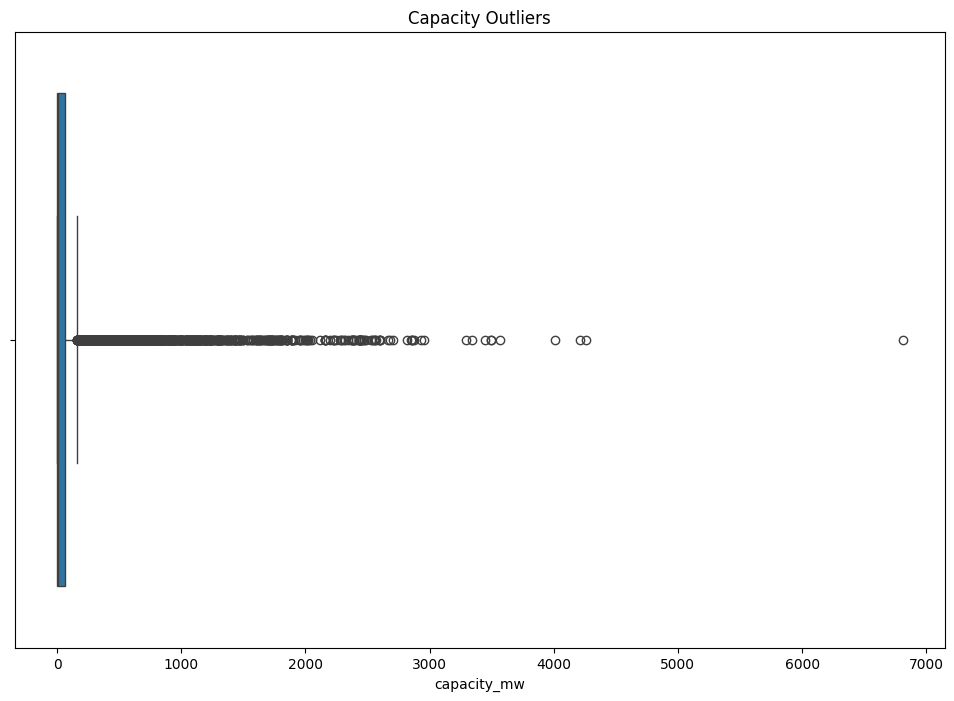

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize outliers in capacity
plt.figure(figsize=(12, 8))
sns.boxplot(x='capacity_mw', data=power_plant_data)
plt.title('Capacity Outliers')
plt.show()


Exploratory Data Analysis (EDA)

Descriptive Statistics

In [30]:
# Descriptive statistics
print(power_plant_data.describe())


       capacity_mw     latitude    longitude  commissioning_year  \
count  9659.000000  9659.000000  9659.000000         9659.000000   
mean    123.607371    39.107290   -94.338453         1998.380332   
std     347.901718     5.491897    18.729141           24.439749   
min       1.000000    18.974200  -171.712400         1896.000000   
25%       2.700000    35.231500  -111.031000         1988.000000   
50%       8.400000    39.662800   -91.093100         2009.000000   
75%      66.700000    42.550600   -78.207300         2016.000000   
max    6809.000000    71.292000   -67.401200         2020.000000   

       year_of_capacity_data  generation_gwh_2013  generation_gwh_2014  \
count                 9659.0          6095.000000          6520.000000   
mean                  2019.0           569.351850           529.815148   
std                      0.0          2062.818040          2004.987630   
min                   2019.0          -947.600000          -989.619000   
25%              

Visualize Capacity by Fuel Type
Understand the distribution of power plant capacities based on primary fuel types.

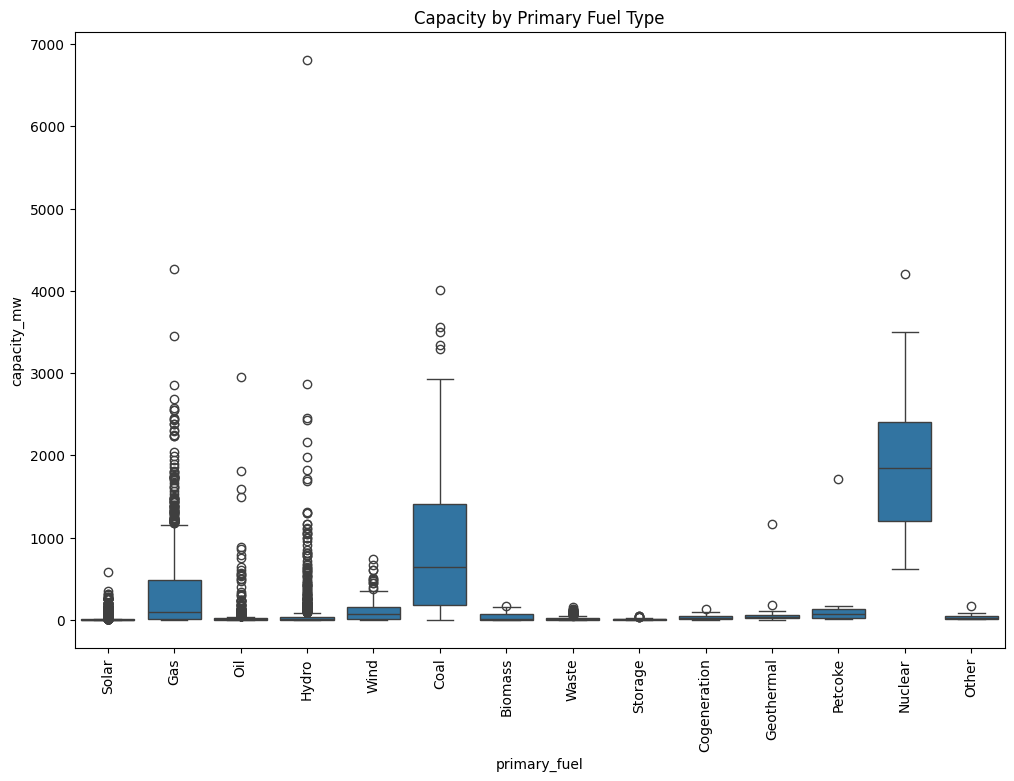

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(x='primary_fuel', y='capacity_mw', data=power_plant_data)
plt.title('Capacity by Primary Fuel Type')
plt.xticks(rotation=90)
plt.show()


Energy Generation Trends
Analyze how energy generation has changed over the years.

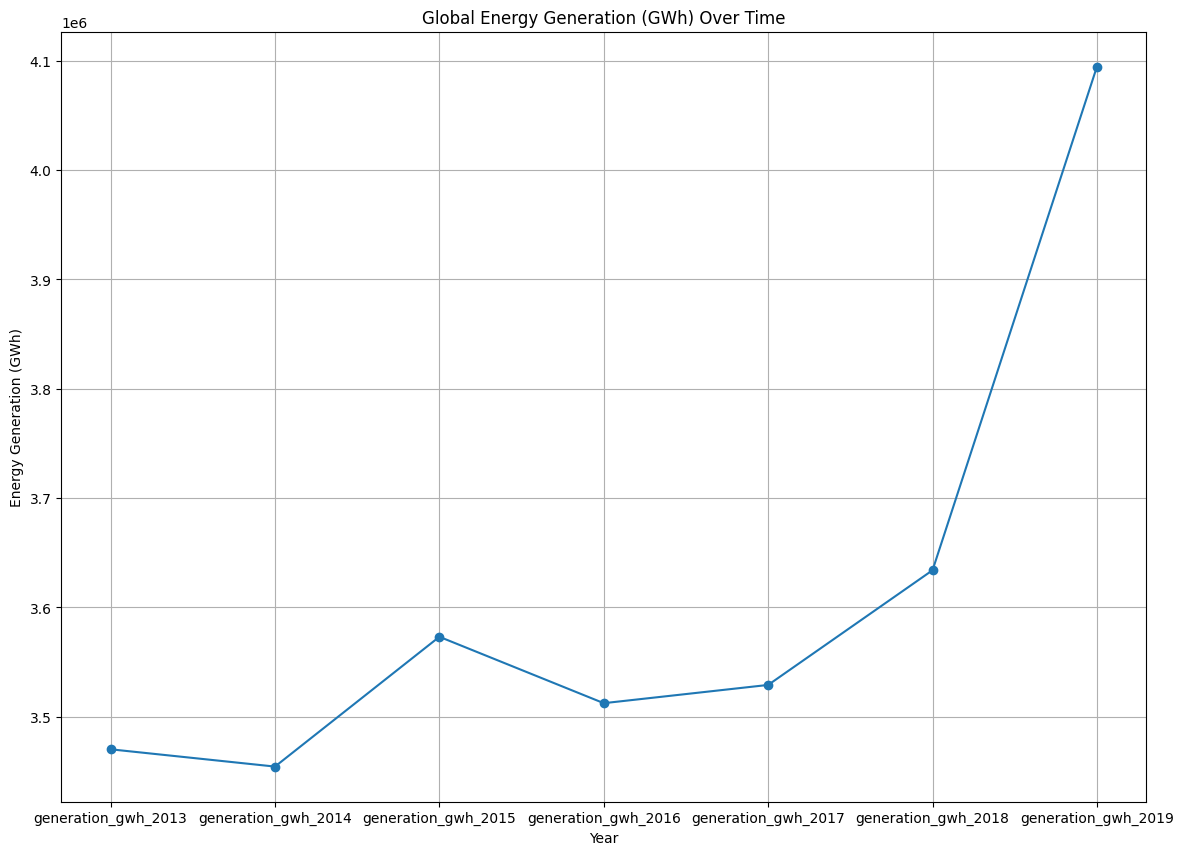

In [32]:
# Sum energy generation for each year
years = ['generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
         'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019']

generation_totals = power_plant_data[years].sum()
generation_totals.plot(kind='line', marker='o', figsize=(14, 10))
plt.title('Global Energy Generation (GWh) Over Time')
plt.ylabel('Energy Generation (GWh)')
plt.xlabel('Year')
plt.grid(True)
plt.show()


Fuel Type Distribution:

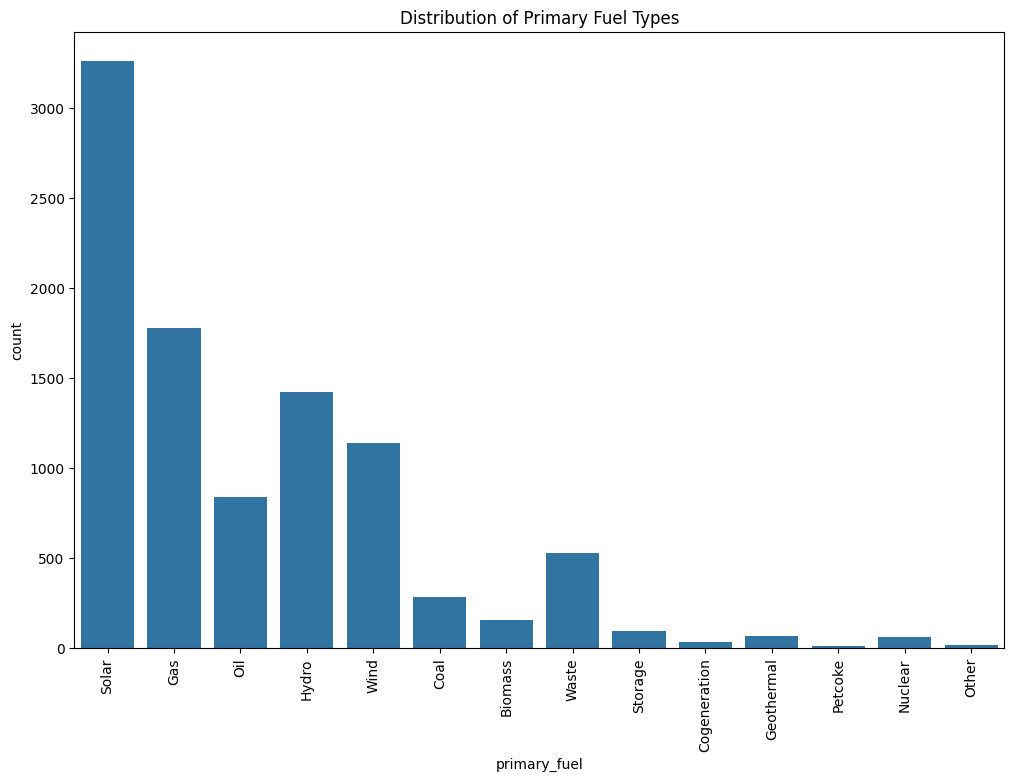

In [33]:
plt.figure(figsize=(12, 8))
sns.countplot(x='primary_fuel', data=power_plant_data)
plt.title('Distribution of Primary Fuel Types')
plt.xticks(rotation=90)
plt.show()


Advanced Analysis

Correlation Analysis
Examine correlations between power plant capacity, fuel types, and energy generation.

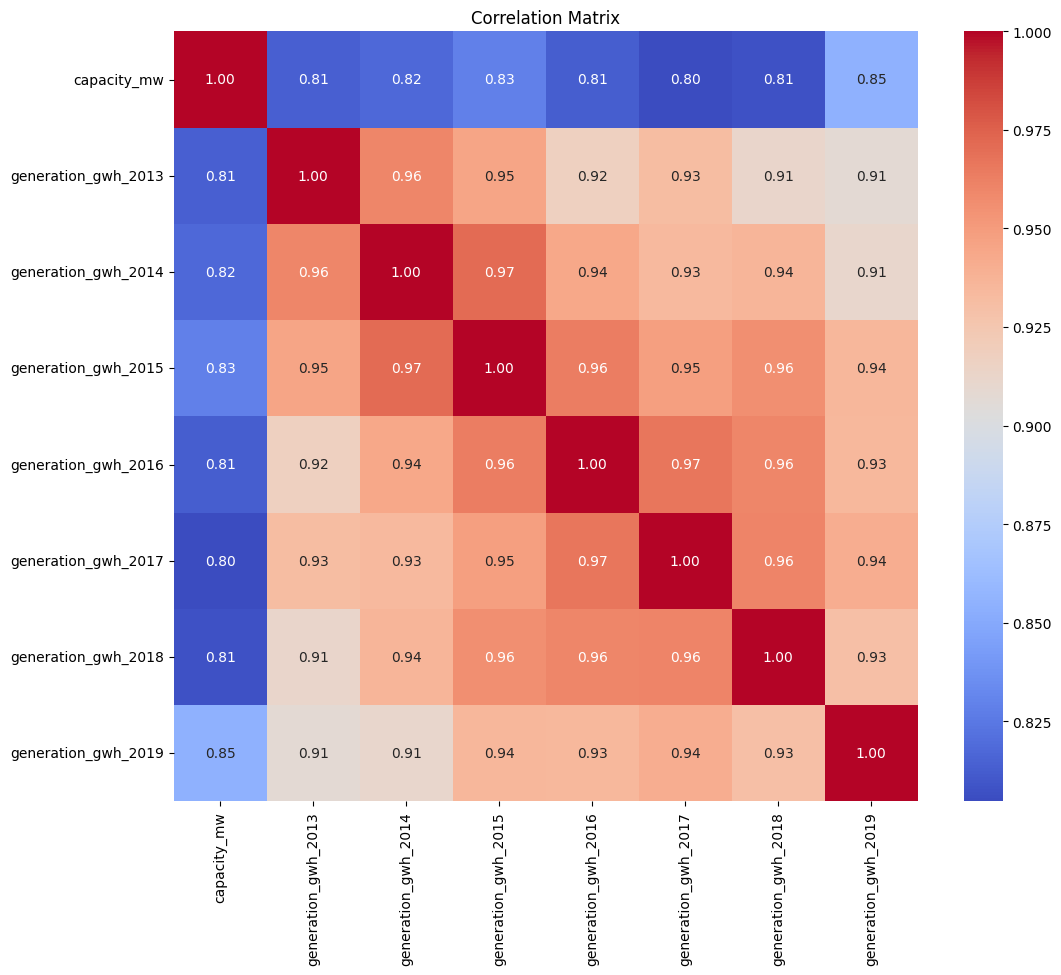

In [34]:
# Calculate correlation matrix
corr_matrix = power_plant_data[['capacity_mw'] + years].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Predictive Modeling:

Feature Engineering:

In [35]:
# Calculate age of the power plant
power_plant_data['age'] = 2019 - power_plant_data['commissioning_year']


Model Building
Train a linear regression model to predict energy generation for 2019.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and target variable
features = ['capacity_mw', 'age']
target = 'generation_gwh_2019'

# Prepare data
X = power_plant_data[features]
y = power_plant_data[target]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 717130.2505783121


Feature Importance:

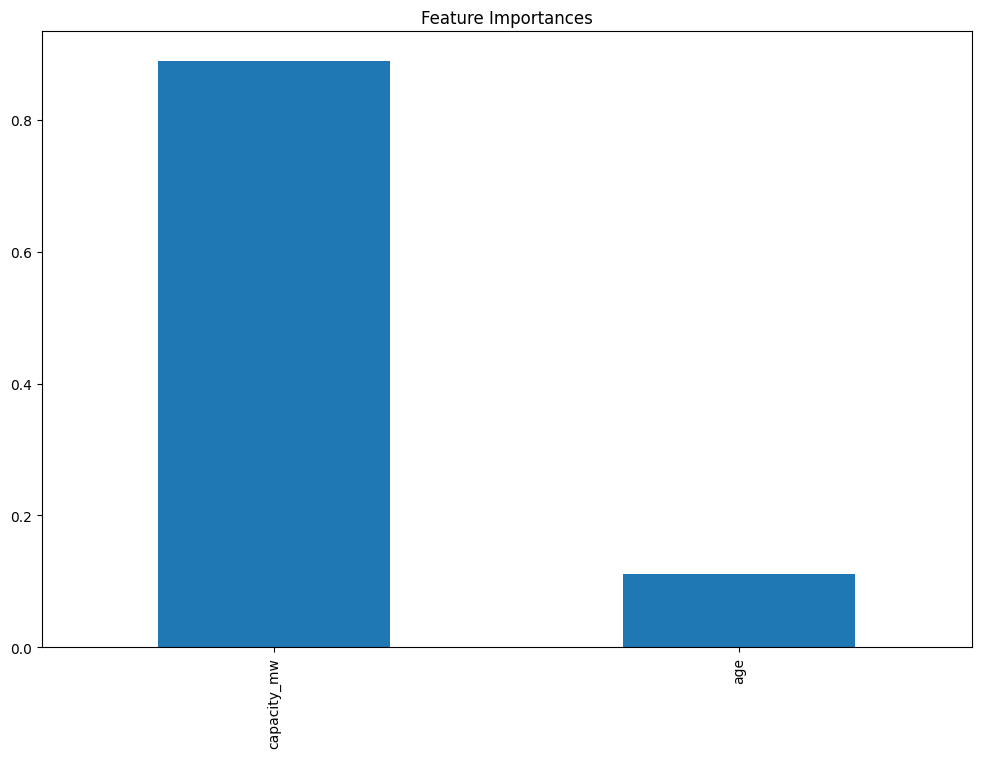

In [37]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

importances = model_rf.feature_importances_
feature_importances = pd.Series(importances, index=features)
feature_importances.plot(kind='bar', figsize=(12, 8))
plt.title('Feature Importances')
plt.show()


Cross-Validation:

In [38]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-Validation MSE Scores: {-scores}')


Cross-Validation MSE Scores: [969288.54727666 676855.55935491 767606.49948758 917944.40858346
 589577.66048918]


Optimization Insights

Capacity Optimization
Identify and suggest optimizations for underperforming power plants.

In [39]:
# Identify underperforming power plants
underperformers = power_plant_data[power_plant_data['generation_gwh_2019'] < (power_plant_data['capacity_mw'] * 8760 * 0.5)]
print(underperformers[['name', 'capacity_mw', 'generation_gwh_2019']])


                                       name  capacity_mw  generation_gwh_2019
24710            100 Brook Hill Drive Solar          2.0              2.46700
24711             1025 Traveller Solar  LLC          5.0              1.33200
24712       1047 Little Mountain Solar  LLC          3.0              1.41700
24713                12 Applegate Solar LLC          1.9              2.34900
24714                   126 Grove Solar LLC          2.0              2.30300
...                                     ...          ...                  ...
34538  Zion Landfill Gas to Energy Facility          7.0             22.64700
34539                                  Zorn         18.0             -0.04500
34540              Zotos International WPGF          3.4              1.21100
34541         Zumbro Community Solar Garden          1.0              1.58900
34542                   eBay - South Jordan          9.8             72.06506

[9659 rows x 3 columns]


Cost-Benefit Analysis:

In [40]:
# Example cost-benefit calculation (pseudo-code)
optimization_cost = 500000  # Example cost
average_price_per_mwh = 50  # Example price in USD
potential_savings = underperformers['capacity_mw'] * 8760 * 0.5 * average_price_per_mwh - optimization_cost


Scenario Analysis:

In [41]:
# Simulate improvements
improved_generation = power_plant_data['generation_gwh_2019'] * 1.1  # Assume 10% improvement
potential_increase = improved_generation - power_plant_data['generation_gwh_2019']
